# DSE 207R FINAL PROJECT
## Fall 2024
### Due Date:  December 10th, 2024

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries.

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting. Make sure to follow Slack for any updates on the final project.

# <b>Deliverables</b>:
The final project has 2 submissions - a report (this notebook) and an presentation video (self recorded). You will be evaluated on both the components.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset (on GitHub) such that it can be used as a URL directly. Don't forget to add your name on top as the author of the notebook.



There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.

Below are some resources but you are not limited to them -

UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php <br>
Kaggle: https://www.kaggle.com/datasets <br>
KDnuggets Dataset: http://www.kdnuggets.com/datasets/index.html <br>
government data (http://www.kdnuggets.com/datasets/government-local-public.html) <br>
Data APIs (http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html <br>
Data Mining Competitions (http://www.kdnuggets.com/competitions/index.html <br>
US Government Data: https://www.data.gov/ <br>
UK Government Data: https://data.gov.uk/ <br>
Canada's Open Data Exchange: https://codx.ca/ <br>
World Health Organization: http://www.who.int/gho/en <br>
World Bank: http://data.worldbank.org/ <br>

Remember! Finding a dataset of interest and exploring it is most of your job for your final project. So expect this to take some time - and that's both perfectly normal and completely okay. Get started early and make sure to check if the dataset you find satisfies the project requirements.
<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION
url = 'https://raw.githubusercontent.com/dannyxia7/Datasets/refs/heads/main/shot_logs.csv'
df = pd.read_csv(url)

### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your dataset?

In [ ]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION
print(df.shape)
df.info()
df.describe()

(128069, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  S

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [ ]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [ ]:
df.tail()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127
128068,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,9,4,0:12,NaN,5,...,5.1,2,made,"Bradley, Avery",202340,2.3,1,2,jarrett jack,101127


#High Level View

This dataset contains information about shots taken in the 2014-2015 season of the NBA. It has categorical variables including the closest defender and the player who shot the ball, as well as numerical variables: amount of time left on the shot clock, type of shot, and shot distance, which may have a relationship with whether or not the shot is made.

In [ ]:
df.isnull().values.any()

True

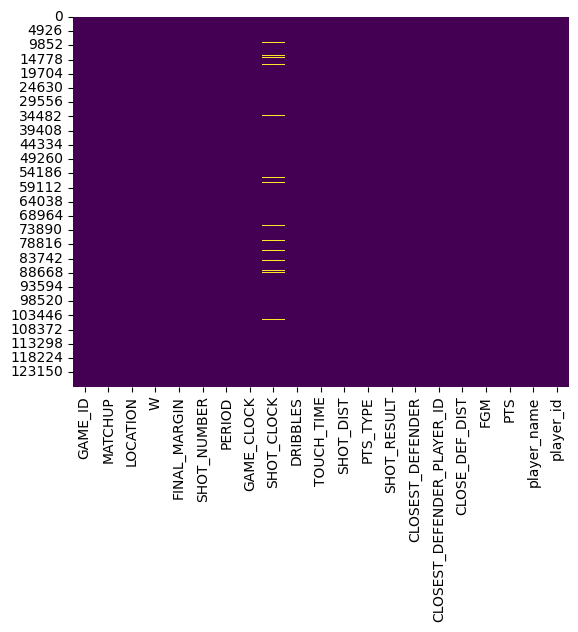

In [ ]:
#heatmap of where the null values in the dataset are
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
null_shot_clock_df = df[df['SHOT_CLOCK'].isnull()]
null_shot_clock_df
print(len(null_shot_clock_df))
null_shot_clock_df

5567


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
24,21400845,"FEB 25, 2015 - CHA @ CHI",A,W,12,6,2,0:04,NaN,0,...,25.2,3,missed,"Butler, Jimmy",202710,3.6,0,0,brian roberts,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,0:01,NaN,5,...,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
76,21400742,"FEB 05, 2015 - CHA vs. WAS",H,W,7,10,3,0:01,NaN,2,...,13.1,2,made,"Butler, Rasual",2446,2.5,1,2,brian roberts,203148
129,21400611,"JAN 19, 2015 - CHA vs. MIN",H,W,25,7,2,0:02,NaN,5,...,12.0,2,missed,"Williams, Mo",2590,4.0,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128008,21400138,"NOV 15, 2014 - BKN @ POR",A,L,-10,3,2,0:02,NaN,0,...,20.6,3,missed,"Blake, Steve",2581,1.7,0,0,jarrett jack,101127
128017,21400138,"NOV 15, 2014 - BKN @ POR",A,L,-10,12,4,0:03,NaN,5,...,8.5,2,missed,"Lillard, Damian",203081,4.5,0,0,jarrett jack,101127
128018,21400121,"NOV 13, 2014 - BKN @ GSW",A,L,-8,1,1,0:02,NaN,24,...,4.8,2,made,"Barbosa, Leandro",2571,5.0,1,2,jarrett jack,101127
128051,21400044,"NOV 03, 2014 - BKN vs. OKC",H,W,31,2,1,0:16,NaN,3,...,2.6,2,made,"Telfair, Sebastian",2742,5.4,1,2,jarrett jack,101127


In [ ]:
no_shot_clock_df = df.drop(null_shot_clock_df.index)
no_shot_clock_df.isnull().values.any()

False

In [ ]:
#shots incorrectly labeled as 3 pointers when their shot distance is within the three point line
df[(df['SHOT_DIST'] < 22) & (df['PTS_TYPE'] == 3)]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
217,21400395,"DEC 20, 2014 - CHA vs. UTA",H,W,18,4,4,8:43,7.7,0,...,21.8,3,missed,"Exum, Dante",203957,5.5,0,0,brian roberts,203148
298,21400195,"NOV 23, 2014 - CHA @ MIA",A,L,-1,1,1,2:40,4.6,0,...,21.9,3,missed,"Napier, Shabazz",203894,4.2,0,0,brian roberts,203148
1682,21400862,"FEB 27, 2015 - MIN @ CHI",A,L,-7,4,2,5:08,6.4,0,...,20.9,3,missed,"Snell, Tony",203503,1.3,0,0,gary neal,202390
1877,21400423,"DEC 23, 2014 - CHA @ MIL",A,W,7,7,2,0:03,NaN,0,...,19.0,3,missed,"Mayo, O.J.",201564,6.2,0,0,gary neal,202390
1958,21400316,"DEC 10, 2014 - CHA vs. BOS",H,W,9,4,4,11:48,11.5,2,...,21.6,3,missed,"Turner, Evan",202323,2.2,0,0,gary neal,202390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127729,21400551,"JAN 10, 2015 - BKN @ DET",A,L,-5,5,2,0:34,13.1,0,...,21.6,3,missed,"Jennings, Brandon",201943,6.2,0,0,jarrett jack,101127
127732,21400551,"JAN 10, 2015 - BKN @ DET",A,L,-5,8,3,11:06,6.6,0,...,21.8,3,missed,"Jennings, Brandon",201943,5.5,0,0,jarrett jack,101127
127806,21400461,"DEC 29, 2014 - BKN vs. SAC",H,W,8,6,2,2:17,17.9,0,...,21.7,3,made,"McLemore, Ben",203463,13.2,1,3,jarrett jack,101127
127945,21400256,"DEC 02, 2014 - BKN @ NYK",A,W,5,8,4,7:09,6.3,0,...,21.7,3,missed,"Wear, Travis",204037,8.9,0,0,jarrett jack,101127


In [ ]:
#shots incorrectly labeled as 2 pointers when their shot distance is greater than the max distance of the 3 point line to the basket
df[(df['SHOT_DIST'] > 23.75) & (df['PTS_TYPE'] == 2)]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
888,21400355,"DEC 15, 2014 - CHA @ CLE",A,L,-9,13,4,0:17,NaN,0,...,27.9,2,made,"Marion, Shawn",1890,7.0,1,2,al jefferson,2744
1435,21400510,"JAN 05, 2015 - CHA @ BOS",A,W,9,6,2,2:47,19.7,0,...,24.9,2,made,"Zeller, Tyler",203092,9.2,1,2,cody zeller,203469
1741,21400713,"JAN 31, 2015 - CHA @ DEN",A,W,18,5,2,6:07,20.8,0,...,28.4,2,missed,"Afflalo, Arron",201167,10.0,0,0,gary neal,202390
1806,21400510,"JAN 05, 2015 - CHA @ BOS",A,W,9,7,2,6:08,13.2,4,...,24.5,2,missed,"Turner, Evan",202323,0.6,0,0,gary neal,202390
1940,21400334,"DEC 12, 2014 - CHA @ MEM",A,L,-6,1,1,2:05,19.9,7,...,25.6,2,missed,"Koufos, Kosta",201585,8.8,0,0,gary neal,202390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126356,21400759,"FEB 07, 2015 - BKN @ WAS",A,L,-37,6,2,6:31,0.5,0,...,24.3,2,missed,"Butler, Rasual",2446,5.5,0,0,joe johnson,2207
126419,21400683,"JAN 28, 2015 - BKN @ ATL",A,L,-11,14,3,4:05,18.0,6,...,23.9,2,missed,"Sefolosha, Thabo",200757,5.0,0,0,joe johnson,2207
126501,21400564,"JAN 12, 2015 - BKN vs. HOU",H,L,-14,3,2,5:18,10.1,0,...,23.8,2,made,"Ariza, Trevor",2772,8.9,1,2,joe johnson,2207
127235,21400539,"JAN 09, 2015 - BKN vs. PHI",H,L,-2,2,2,8:57,2.5,7,...,24.4,2,missed,"Wroten, Tony",203100,3.8,0,0,bojan bogdanovic,202711


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'FINAL_MARGIN'),
  Text(1, 0, 'SHOT_NUMBER'),
  Text(2, 0, 'PERIOD'),
  Text(3, 0, 'SHOT_CLOCK'),
  Text(4, 0, 'DRIBBLES'),
  Text(5, 0, 'TOUCH_TIME'),
  Text(6, 0, 'SHOT_DIST'),
  Text(7, 0, 'PTS_TYPE'),
  Text(8, 0, 'CLOSE_DEF_DIST'),
  Text(9, 0, 'FGM'),
  Text(10, 0, 'PTS')])

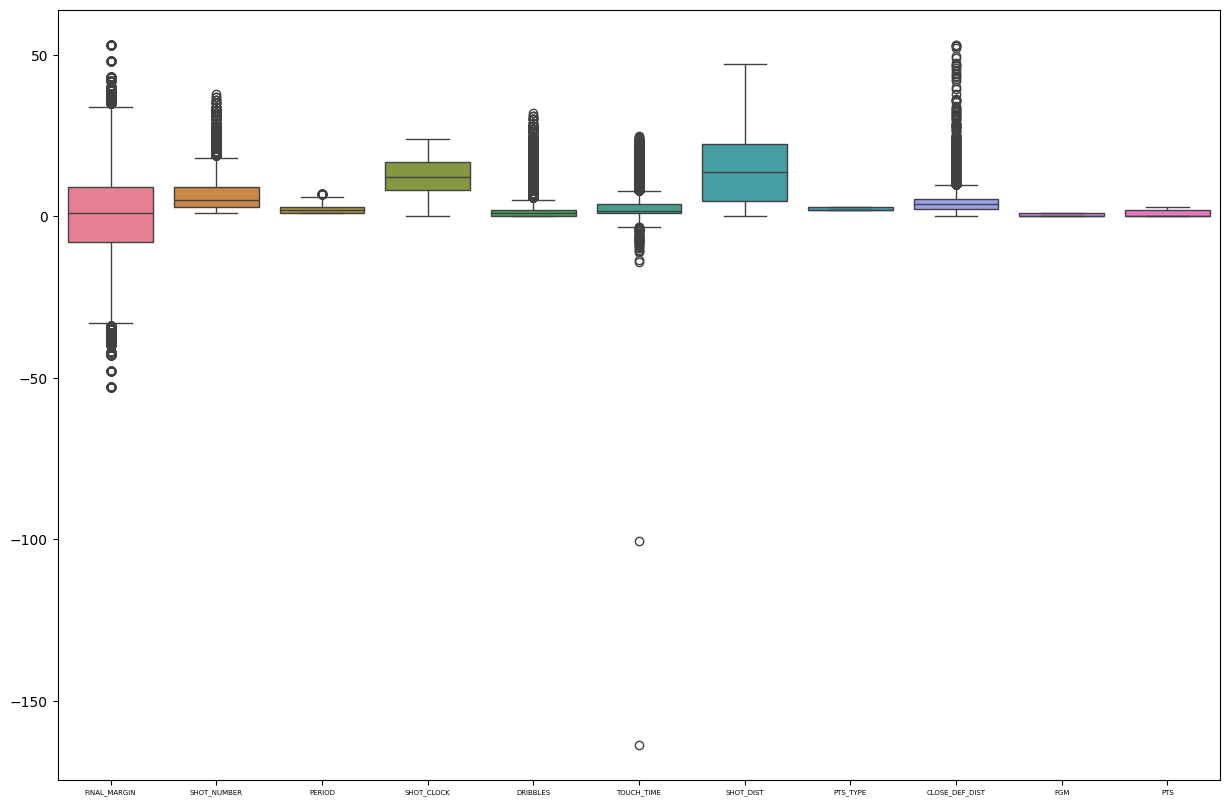

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df.drop(["GAME_ID", "player_id", "MATCHUP", "CLOSEST_DEFENDER_PLAYER_ID"], axis=1))
plt.xticks(fontsize=5)

In [ ]:
df[df['CLOSE_DEF_DIST'] > 30]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
4877,21400655,"JAN 24, 2015 - UTA vs. BKN",H,W,35,13,4,6:20,21.6,2,...,2.4,2,made,"Jack, Jarrett",101127,52.6,1,2,gordon hayward,202330
15383,21400603,"JAN 17, 2015 - GSW @ HOU",A,W,25,2,1,11:04,20.7,3,...,2.1,2,made,"Beverley, Patrick",201976,40.1,1,2,klay thompson,202691
17604,21400452,"DEC 27, 2014 - GSW vs. MIN",H,W,13,4,3,3:37,21.0,2,...,2.6,2,made,"Budinger, Chase",201978,32.5,1,2,draymond green,203110
21524,21400602,"JAN 17, 2015 - ATL @ CHI",A,W,8,12,3,6:02,21.2,5,...,3.6,2,made,"Butler, Jimmy",202710,37.9,1,2,jeff teague,201952
21628,21400492,"JAN 02, 2015 - ATL @ UTA",A,W,6,12,3,9:31,22.4,1,...,4.0,2,made,"Favors, Derrick",202324,32.3,1,2,jeff teague,201952
30435,21400153,"NOV 17, 2014 - NOP @ POR",A,L,-9,3,1,8:43,21.0,0,...,3.5,2,made,"Lillard, Damian",203081,32.4,1,2,anthony davis,203076
31146,21400481,"DEC 31, 2014 - NOP @ SAS",A,L,-2,7,5,2:36,21.1,1,...,3.2,2,made,"Mills, Patty",201988,34.3,1,2,jimmer dredette,202690
33593,21400175,"NOV 21, 2014 - TOR vs. MIL",H,W,42,6,2,6:01,21.0,3,...,3.1,2,made,"Ilyasova, Ersan",101141,30.3,1,2,greivis vasquez,202349
41898,21400897,"MAR 04, 2015 - ORL vs. PHX",H,L,-5,21,4,9:22,21.3,0,...,3.4,2,made,"Thornton, Marcus",201977,52.0,1,2,victor oladipo,203506
42179,21400588,"JAN 16, 2015 - ORL vs. MEM",H,L,-10,8,2,7:03,21.3,1,...,2.8,2,made,"Green, Jeff",201145,47.4,1,2,victor oladipo,203506


In [ ]:
q1 = df['CLOSE_DEF_DIST'].quantile(0.25)  # First quartile (Q1)
q3 = df['CLOSE_DEF_DIST'].quantile(0.75)  # Third quartile (Q3)
iqr = q3 - q1  # Interquartile range (IQR)

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(upper_bound)
df[df['CLOSE_DEF_DIST'] > 9.8]

9.8


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,...,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148
18,21400859,"FEB 27, 2015 - CHA @ BOS",A,L,-8,5,4,10:29,20.8,0,...,24.2,3,made,"Thomas, Isaiah",202738,11.1,1,3,brian roberts,203148
31,21400816,"FEB 21, 2015 - CHA vs. OKC",H,L,-7,1,1,1:18,10.3,0,...,24.1,3,missed,"Augustin, D.J.",201571,10.2,0,0,brian roberts,203148
41,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,1,1,5:58,19.7,0,...,24.7,3,made,"Miles, CJ",101139,11.3,1,3,brian roberts,203148
63,21400761,"FEB 07, 2015 - CHA @ PHI",A,L,-8,9,3,2:52,0.3,0,...,26.7,3,missed,"Grant, Jerami",203924,11.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127806,21400461,"DEC 29, 2014 - BKN vs. SAC",H,W,8,6,2,2:17,17.9,0,...,21.7,3,made,"McLemore, Ben",203463,13.2,1,3,jarrett jack,101127
127854,21400421,"DEC 23, 2014 - BKN vs. DEN",H,W,6,13,4,0:27,21.8,1,...,2.0,2,made,"Lawson, Ty",201951,44.0,1,2,jarrett jack,101127
127890,21400364,"DEC 16, 2014 - BKN vs. MIA",H,L,-4,5,4,2:01,11.9,2,...,23.5,3,missed,"Andersen, Chris",2365,11.3,0,0,jarrett jack,101127
127899,21400341,"DEC 13, 2014 - BKN @ CHA",A,W,27,8,4,7:01,5.8,19,...,20.1,2,missed,"Roberts, Brian",203148,10.5,0,0,jarrett jack,101127


In [ ]:
df['TOUCH_TIME'][df['TOUCH_TIME'] < 0]

,TOUCH_TIME
748,-4.3
775,-0.4
1043,-2.3
1118,-3.2
1260,-1.3
...,...
124820,-4.2
125018,-1.2
125057,-8.8
125059,-0.4


In [ ]:
converted_df = df.copy()
converted_df['SHOT_RESULT'] = converted_df['SHOT_RESULT'].map({'made': 1, 'missed': 0})
converted_df['LOCATION'] = converted_df['LOCATION'].map({'H': 1, 'A': 0})
converted_df['W'] = converted_df['W'].map({'W': 1, 'L': 0})
converted_df.drop(converted_df[(converted_df['SHOT_DIST'] < 22) & (converted_df['PTS_TYPE'] == 3)].index, inplace=True)
converted_df.drop(converted_df[(converted_df['SHOT_DIST'] > 23.75) & (converted_df['PTS_TYPE'] == 2)].index, inplace=True)
converted_df.drop(converted_df[converted_df['TOUCH_TIME'] < 0].index, inplace=True)
converted_df.dropna(subset=['SHOT_CLOCK'], inplace=True)
converted_df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,1:09,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,0:14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,11:47,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,10:34,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,6,2,8:15,9.1,2,...,18.4,2,0,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,4,2,5:05,15.3,2,...,8.9,2,1,"Sullinger, Jared",203096,5.7,1,2,jarrett jack,101127
128064,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,5,3,1:52,18.3,5,...,8.7,2,0,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,6,4,11:28,19.8,4,...,0.6,2,1,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,7,4,11:10,23.0,2,...,16.9,2,1,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127


#Preliminary Exploration

First, I looked at the basic information of the dataset to get a feel for it. I checked if there were null values and confirmed that there were. Then I created a heatmap to see where those null values existed, and I found that they were all located in the SHOT_CLOCK column. To make sure, I dropped the SHOT_CLOCK column and checked to see if there were any null values in the resulting dataset, and I found that there were not.

I also found rows where the shot distance and the label as 2 pointer or 3 pointer did not match up. I believe that the best way to deal with this would be to simply remove these rows, though this may introduce some potential bias into the data. I also found rows where the touch time is negative, and what is written above would apply as well.

I created a box plot, excluding categorical columns, and I found that  the columns TOUCH_TIME, DRIBBLES, and SHOT_NUMBER have many outliers that lie past the whiskers. This makes sense, however, because there are certain star players that will have a disproportiate usage rate, meaning that they will have the ball far more often than other players. For FINAL_MARGIN, there will be outliers where one team is dominated by another which is natural.

The one concerning column for me is CLOSE_DEF_DIST, where there seem to be a large amount of outliers. For the most extreme outliers, they seem to follow the pattern of a shot being made very close to the rim (within 3 feet or so), while the closest defender is extremely far away (30 feet or more) and very early in the shot clock. Given that these outliers account for roughly 0.025% of the data, and with domain knowledge of these sorts of shots being people trying to cherrypick free baskets by staying up court, I believe these outliers are valid.

After doing this exploratory analysis, I pre-processed the data by removing all the rows with null values in the SHOT_CLOCK column, the rows where the shot distance and type of shot label didn't match up, and rows with negative values for TOUCH_TIME.

One transformation that could be useful would be to convert the categorical variables, like SHOT_RESULT, into binary data. And if we are trying to create a model, we should create a dataset with GAME_ID and MATCHUP removed.

### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



In [ ]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

#Research Questions

1. What are the factors that correlate most heavily with whether a shot is made or not?

2. Can we create an ML model that would be able to predict whether a shot is made or not with reasonable accuracy?

3. Is there a significant difference in the percentage of shots made in clutch time (last five minutes of the game) versus the rest of the game?

#Research Question 1

<Axes: >

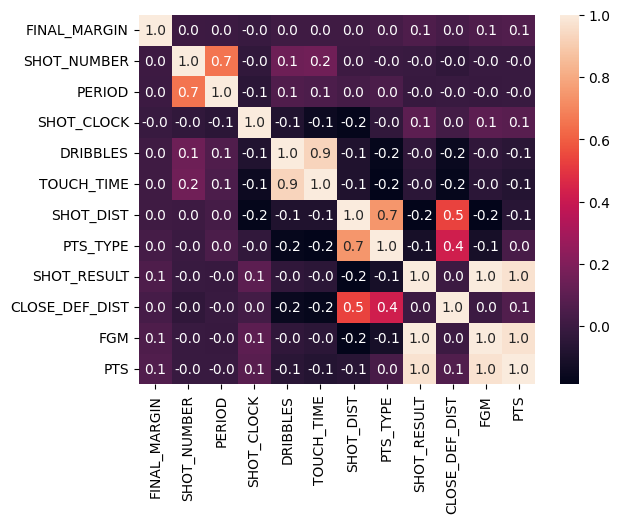

In [ ]:
corr = converted_df.drop(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'player_id', 'player_name', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'GAME_CLOCK'], axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".1f")

#Research Question 1 Conclusion

We can see that there are three variables perfectly correlated with each other, SHOT_RESULT, FGM, and PTS. Since SHOT_RESULT is the variables we are trying to predict, we should remove FGM and PTS to prevent multicollinearity from becoming an issue for any model we build to predict whether or not a shot is made. Ignoring those two, it seems that the variables with the strongest relationship with SHOT_RESULT are SHOT_DIST, PTS_TYPE, SHOT_CLOCK, and FINAL_MARGIN. For SHOT_DIST, it makes sense that the farther a shot, the harder it is to make. PTS_TYPE follows the same logic, as a 3 point shot is always farther from the basket than a 2 point shot. For SHOT_CLOCK, the positive relationship makes sense because the more time a team has in the shot clock, the more potential options they have to get a better quality shot that would have a higher chance of going in. And the correlation between SHOT_RESULT and FINAL_MARGIN makes sense, because the winning team will more likely be making more shots.

#Research Question 2

2. Can we create an ML model that would be able to predict whether a shot is made or not with reasonable accuracy?

In [ ]:
#splitting data into training and test sets, removing categorical variables and variables with 1.0 correlation to deal with multicollinearity
X_data = converted_df.drop(['SHOT_RESULT', 'GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'player_id', 'player_name', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'GAME_CLOCK', 'FGM', 'PTS'], axis=1)
y_target = converted_df['SHOT_RESULT']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (96736, 9)
X_test shape:  (24185, 9)
y_train shape:  (96736,)
y_test shape:  (24185,)


In [ ]:
# linear regressor rounded for classification
shot_regressor = LinearRegression()
shot_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
shot_predictions = shot_regressor.predict(X_test)

In [ ]:
rmse = mean_squared_error(shot_predictions, y_test)
print(rmse)

0.23493157438878404


In [ ]:
shot_regressor.intercept_

0.49294209856859766

In [ ]:
shot_regressor.coef_

array([ 0.00211082,  0.00177022, -0.00616651,  0.00358028,  0.00815278,
       -0.01629186, -0.01498065,  0.0263408 ,  0.02241801])

In [ ]:

pred_df = X_test.copy()
pred_df['Predictions'] = np.rint(shot_predictions)
correct = np.rint(shot_predictions) == y_test
correct_percentage = np.sum(correct) / len(correct) * 100

pred_df['Actual'] = y_test
pred_df
print(correct_percentage)

60.3845358693405


In [ ]:
#sklearn ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#logistic regression for classifying shot makes/misses
log_regressor = LogisticRegression()
log_regressor.fit(X_train, y_train)
log_shot_predictions = log_regressor.predict(X_test)

In [ ]:
log_rmse = mean_squared_error(log_shot_predictions, y_test)
print(log_rmse)

0.39623733719247467


In [ ]:
log_acc_train = accuracy_score(y_test, log_shot_predictions)
print(acc_train)

0.6037626628075253


In [ ]:
#decision tree classification
dt_regressor = DecisionTreeClassifier()
dt_regressor.fit(X_train, y_train)
dt_shot_predictions = dt_regressor.predict(X_test)

In [ ]:
dt_rmse = mean_squared_error(dt_shot_predictions, y_test)
print(dt_rmse)

0.45792846805871407


In [ ]:
dt_acc_train = accuracy_score(y_test, dt_shot_predictions)
print(dt_acc_train)

0.5420715319412859


In [ ]:
# Naive-Bayes classification
nb_regressor = BernoulliNB()
nb_regressor.fit(X_train, y_train)
nb_shot_predictions = nb_regressor.predict(X_test)

In [ ]:
nb_acc_train = accuracy_score(y_test, nb_shot_predictions)
print(nb_acc_train)

0.538722348563159


#Research Question 2 Conclusion

I tried four models: linear regression with rounding the prediction, logistic regression, decision tree classification, and Naive Bayes classification. I wouldn't recommend the first one, but I just wanted to try it and see the result. Out of the classification models, the logistic regression model had the best result with an accuracy of 0.6038 and an rmse of 0.396. While this seems to be better than random guessing which would have an accuracy of approximately 0.5, this model will still give predictions that will be wrong relatively frequently. Given the nature of shooting, I believe we can reasonably assume that there are other factors at play that are not measured in our dataset, as well as the inherent randomness of shooting, given that even the best shooter in the world, Stephen Curry, 'only' makes 42.5% of his threes.


#Research Question 3

3. Is there a significant difference in the percentage of shots made in clutch time (last five minutes of the game) versus the rest of the game?

We can perform a hypothesis test to answer this question. Let mu_c be the percentage of shots made in the clutch, and let mu_n be the percentage of shots made before clutch time.

#**H0**: mu_c = mu_n

#**Ha**: mu_c != mu_n


In [ ]:
import datetime

def time_to_seconds(time_str):
  """Converts a time string in 'HH:MM:SS' format to seconds."""
  m, s = map(int, time_str.split(':'))
  return int(m * 60 + s)

time_str = "30:45"
seconds = time_to_seconds(time_str)
print(seconds)

1845


In [ ]:
game_clock_df = converted_df["GAME_CLOCK"].apply(time_to_seconds)

,GAME_CLOCK
0,69
1,14
3,707
4,634
5,495
...,...
128063,305
128064,112
128065,688
128066,670


In [ ]:
base_df = converted_df.copy()
base_df["GAME_CLOCK"] = game_clock_df
base_df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,69,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,707,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,634,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,6,2,495,9.1,2,...,18.4,2,0,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,4,2,305,15.3,2,...,8.9,2,1,"Sullinger, Jared",203096,5.7,1,2,jarrett jack,101127
128064,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,5,3,112,18.3,5,...,8.7,2,0,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,6,4,688,19.8,4,...,0.6,2,1,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,7,4,670,23.0,2,...,16.9,2,1,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127


In [ ]:
#split the dataset and then compare the fg%
clutch_df = base_df[(base_df["PERIOD"] >= 4) & (base_df["GAME_CLOCK"] <= 300)]
clutch_df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
39,21400783,"FEB 10, 2015 - CHA vs. DET",1,0,-28,5,4,93,12.1,0,...,24.0,3,0,"Dinwiddie, Spencer",203915,6.7,0,0,brian roberts,203148
40,21400783,"FEB 10, 2015 - CHA vs. DET",1,0,-28,6,4,25,8.3,6,...,9.3,2,0,"Jerebko, Jonas",201973,3.6,0,0,brian roberts,203148
53,21400768,"FEB 08, 2015 - CHA vs. IND",1,0,-1,13,4,170,6.5,2,...,11.4,2,0,"Hill, George",201588,3.2,0,0,brian roberts,203148
64,21400761,"FEB 07, 2015 - CHA @ PHI",0,0,-8,10,4,216,15.8,11,...,19.6,2,0,"Frazier, Tim",204025,2.7,0,0,brian roberts,203148
65,21400761,"FEB 07, 2015 - CHA @ PHI",0,0,-8,11,4,117,11.7,2,...,25.3,3,0,"Noel, Nerlens",203457,5.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128027,21400121,"NOV 13, 2014 - BKN @ GSW",0,0,-8,10,4,93,13.2,13,...,16.8,2,1,"Barbosa, Leandro",2571,2.9,1,2,jarrett jack,101127
128031,21400116,"NOV 12, 2014 - BKN @ PHX",0,0,-8,4,4,259,14.0,0,...,23.8,3,0,"Thomas, Isaiah",202738,2.8,0,0,jarrett jack,101127
128041,21400075,"NOV 07, 2014 - BKN vs. NYK",1,1,11,4,4,263,10.3,3,...,7.5,2,1,"Larkin, Shane",203499,0.9,1,2,jarrett jack,101127
128042,21400075,"NOV 07, 2014 - BKN vs. NYK",1,1,11,5,4,6,4.0,20,...,6.8,2,1,"Wear, Travis",204037,0.9,1,2,jarrett jack,101127


In [ ]:
not_clutch_df = base_df[(base_df["PERIOD"] < 4) | (base_df["GAME_CLOCK"] > 300)]
not_clutch_df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,69,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,707,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,634,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,6,2,495,9.1,2,...,18.4,2,0,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128062,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,3,2,466,7.0,1,...,14.5,2,1,"Smart, Marcus",203935,3.1,1,2,jarrett jack,101127
128063,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,4,2,305,15.3,2,...,8.9,2,1,"Sullinger, Jared",203096,5.7,1,2,jarrett jack,101127
128064,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,5,3,112,18.3,5,...,8.7,2,0,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",0,0,-16,6,4,688,19.8,4,...,0.6,2,1,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127


In [ ]:
clutch_accuracy = len(clutch_df[clutch_df["SHOT_RESULT"] == 1]) / len(clutch_df)
not_clutch_accuracy = len(not_clutch_df[not_clutch_df["SHOT_RESULT"] == 1]) / len(not_clutch_df)
print(clutch_accuracy)
print(not_clutch_accuracy)

0.44177524429967424
0.45949503410314707


In [ ]:
clutch_sd = np.std(clutch_df["SHOT_RESULT"])
not_clutch_sd = np.std(not_clutch_df["SHOT_RESULT"])
print(clutch_sd)
print(not_clutch_sd)

0.4965983063036347
0.4983566471286299


In [ ]:
test_statistic = (clutch_accuracy - not_clutch_accuracy) / np.sqrt((clutch_sd**2 + not_clutch_sd**2) / len(clutch_df))
print(test_statistic)

-2.7910566433040156


In [ ]:
from scipy.stats import t
df = 120919
p_value = 2 * (1 - t.cdf(abs(test_statistic), df))
print(p_value)

0.0052544510865386584


#Research Question 3
If we use significance level alpha = .05, we reject the null hypothesis. There is probably a significant difference in the field goal percentage, which means that players do tend to shoot slightly worse in the clutch. This makes sense because the pressure is higher in the clutch.

### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


In [ ]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS
#I felt like it would be easier to understand if I put the findings at the end of each question
#If that isn't true, please let me know

# 2. Video

Make a video where you go over each part of the report speaking about the steps you undertook and explaining your work, reasonings, insights and highlighting the important points of the project. You do not need to explain the lines of code (unless you feel it is required).

1. The video should be more than 5 minutes and strictly less than 10 minutes.
2. Both audio and video is required.
3. You can use the zoom to record the video. Start a meeting, start video, start recording and share screen.
4. Make sure your audio is clear before uploading the video to the gradescope.


Additionally (and this is important), ensure you follow the format the video submission. If one of these criteria is missing, we will not grade the video.
* Show some form of ID at the start of the video so we know who you are.
* Show your code in the video by screensharing.
* Show your face in the video.


##Video: https://drive.google.com/file/d/1SMwKxt4rkakqe52tKKIunRQXIzAXLUqI/view?usp=sharing